In [2]:
import os
import re
import pandas as pd

file_path = "/Users/jongcheollee/Desktop/python/ET4510-LCR-PID_v4/z_experiment data storage/20251210 pcm-s5ag"

code = input("4-digit file code?").strip()

csv_files = [f for f in os.listdir(file_path)
             if re.match(fr"^{code}.*\.csv$", f)]

if not csv_files:
    raise FileNotFoundError(f"No CSV file starting with {code} found in the directory.")

csv_to_load = os.path.join(file_path, csv_files[0])
print(f"Importing: {csv_to_load}")

dataFrame = pd.read_csv(csv_to_load, skiprows=5)
print(dataFrame.head())



Importing: /Users/jongcheollee/Desktop/python/ET4510-LCR-PID_v4/z_experiment data storage/20251210 pcm-s5ag/1516_s5-pf-b3b_Z_THR_stopped.csv
   3.2  64.3  90.0  1445046.6666666667  1765.244710766439  -86.87306666666666  \
0  4.0  64.3  90.0        1.442877e+06        1584.178722          -86.889500   
1  4.7  64.4  90.0        1.444773e+06        1248.901740          -86.903267   
2  5.5  64.4  90.0        1.444720e+06         339.803865          -86.891633   
3  6.3  64.5  90.0        1.444747e+06        1810.365218          -86.882533   
4  7.1  64.6  90.0        1.443947e+06         332.298393          -86.917200   

   0.0611966411569214  
0            0.033809  
1            0.023297  
2            0.023270  
3            0.040183  
4            0.043295  


In [ ]:
import matplotlib.pyplot as plt
#for b3 plotting
input("make sure you typed parameters manually")
material = "s5-pf-b3b"
timestamp = code
freq_fixed = "74,000"

fig, ax1 = plt.subplots()

# Left Y-axis: |Z|
ax1.errorbar(
    dataFrame['Time (s)'], dataFrame['Z Avg.'] / 1000, yerr=dataFrame['Z Std.'] / 1000,
    fmt='o-', color='blue', label='|Z|')
ax1.set_xlabel('Time (s)', fontsize=15)
ax1.set_ylabel('|Z| (kΩ)', color='blue', fontsize=15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.text(0.95, -0.13, f'{material}, {timestamp}',
         transform=ax1.transAxes, fontsize=10)
#ax1.set_ylim(594,599)
#ax1.set_ylim(776,782)
ax1.set_ylim(1435,1465)

# Right Y-axis #1: Phase θ
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Time (s)'], dataFrame['THR Avg.'], yerr=dataFrame['THR Std.'],
    fmt='s--', color='red', label='Phase θ')
ax2.set_ylabel('Phase, θ (deg)', color='red', fontsize=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
#ax2.set_ylim(-88.1,-87.5)
#ax2.set_ylim(-88.3,-87.9)
ax2.set_ylim(-88.,-86.5)

# Right Y-axis #2 (offset): Temperature
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))  # Move this y-axis to the right
ax3.plot(
    dataFrame['Time (s)'], dataFrame['PV'],
    marker='s', linestyle='--', color='green', label='Temperature')
ax3.set_ylabel('Temperature (°C)', color='green', fontsize=15)
ax3.tick_params(axis='y', labelcolor='green', labelsize=12)
#ax3.set_ylim(15,70)

# Add grid and title
ax1.grid(True, which='both', ls='--')
plt.title(f'|Z|, θ, & temp over time @ {freq_fixed}Hz', fontsize=16)

plt.show()

KeyError: 'PV'

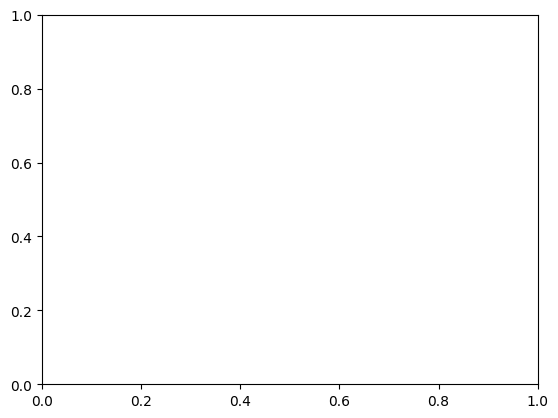

In [3]:
import matplotlib.pyplot as plt
#for b3 plotting
input("make sure you typed parameters manually")
material = "s5-pf-b3b"
timestamp = code
freq_fixed = "74,000"

fig, ax1 = plt.subplots()

# Left Y-axis: |Z|
ax1.errorbar(
    dataFrame['PV'], dataFrame['Z Avg.'] / 1000, yerr=dataFrame['Z Std.'] / 1000,
    fmt='o-', color='blue', label='|Z|')
ax1.set_xlabel('Temperature (°C)', fontsize=15)
ax1.set_ylabel('|Z| (kΩ)', color='blue', fontsize=15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.text(0.95, -0.13, f'{material}, {timestamp}',
         transform=ax1.transAxes, fontsize=10)
ax1.set_ylim(565,568)
#ax1.set_ylim(775,780)

# Right Y-axis #1: Phase θ
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['PV'], dataFrame['THR Avg.'], yerr=dataFrame['THR Std.'],
    fmt='s--', color='red', label='Phase θ')
ax2.set_ylabel('Phase, θ (deg)', color='red', fontsize=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
ax2.set_ylim(-88.7,-88)
#ax2.set_ylim(-88.1,-87.5)

# Right Y-axis #2 (offset): Temperature
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))  # Move this y-axis to the right
ax3.plot(
    dataFrame['PV'], dataFrame['Time (s)'],
    marker='s', linestyle='--', color='green', label='Temperature')
ax3.set_ylabel('Time (s)', color='green', fontsize=15)
ax3.tick_params(axis='y', labelcolor='green', labelsize=12)
ax3.set_ylim(-50, dataFrame['Time (s)'].max()+50)

# Add grid and title
ax1.grid(True, which='both', ls='--')
plt.title(f'|Z|, θ, & temp over time @ {freq_fixed}Hz', fontsize=16)

plt.show()

